# Car MultiClass Classification Using Machine Learning and Deep Learning ANN

This notebook looks into Car classification using several attributes.

## 1. Problem Statement

In this notebook, we would like to model the classification model using several machine learning model and a simple ANN structure

## 2. Data

Data is originated from: https://www.kaggle.com/datasets/pranjalbatra/car-evaluation    


## 3. Evaluation
Since it is a classification problem, there are 4 evaluation metrics need to be measure which are:

1. accuracy score
2. f1 score
3. Precision score
4. Recall score


## 4. Features

The model evaluates cars according to the following concept structure:

CAR car acceptability
. .PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Attribute Information:

Class Values:

unacc, acc, good, vgood


## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('CarEval.csv')
df

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1728 non-null   object
 1   maint         1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   class values  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.isna().sum()

buying          0
maint           0
doors           0
persons         0
lug_boot        0
safety          0
class values    0
dtype: int64

In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class values
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

buying          4
maint           4
doors           4
persons         3
lug_boot        3
safety          3
class values    4
dtype: int64

In [8]:
df.shape

(1728, 7)

In [9]:
df.rename(columns={'class values':'target'},inplace = True)

In [10]:
df['target']

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: target, Length: 1728, dtype: object

In [11]:
df.target.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

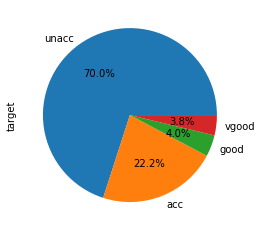

In [12]:
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')


The accuracy metrics is less suitable as there is imbalanced between class

### Safety vs Class values

In [13]:
pd.crosstab(df.safety,df.target)

target,acc,good,unacc,vgood
safety,,,,
high,204,30,277,65
low,0,0,576,0
med,180,39,357,0


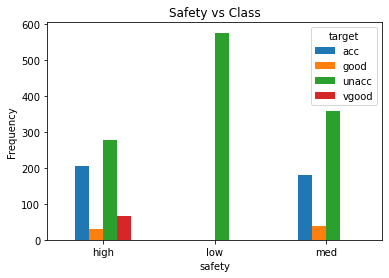

In [14]:
pd.crosstab(df.safety,df.target).plot(kind='bar')
plt.title('Safety vs Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0);

### Relationship between buying and class values

In [15]:
pd.crosstab(df.buying,df.target)

target,acc,good,unacc,vgood
buying,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


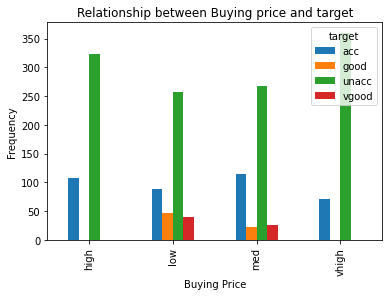

In [16]:
pd.crosstab(df.buying,df.target).plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Buying Price')
plt.title('Relationship between Buying price and target');

### Relationship between price of the maintenance and class values

In [17]:
pd.crosstab(df['maint'],df['target'])

target,acc,good,unacc,vgood
maint,,,,
high,105,0,314,13
low,92,46,268,26
med,115,23,268,26
vhigh,72,0,360,0


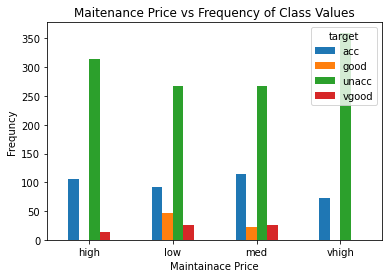

In [18]:
pd.crosstab(df.maint,df.target).plot(kind='bar')
plt.xlabel('Maintainace Price')
plt.ylabel('Frequncy')
plt.title('Maitenance Price vs Frequency of Class Values')
plt.xticks(rotation=0);

### Correlation analysis

In [19]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['buying','maint','doors','persons','lug_boot','safety','target']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])    

In [20]:
df.dtypes

buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
target      int32
dtype: object

In [21]:
df

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [22]:
corr_matrix = df.corr().round(2)
corr_matrix

,buying,maint,doors,persons,lug_boot,safety,target
buying,1.00,-0.00,-0.00,-0.0,-0.00,-0.00,0.05
maint,-0.00,1.00,-0.00,-0.0,-0.00,-0.00,0.04
doors,-0.00,-0.00,1.00,0.0,-0.00,0.00,-0.03
persons,-0.00,-0.00,0.00,1.0,0.00,0.00,-0.30
lug_boot,-0.00,-0.00,-0.00,0.0,1.00,-0.00,0.03
safety,-0.00,-0.00,0.00,0.0,-0.00,1.00,-0.02
target,0.05,0.04,-0.03,-0.3,0.03,-0.02,1.00


In [23]:
corr_matrix['target']

buying      0.05
maint       0.04
doors      -0.03
persons    -0.30
lug_boot    0.03
safety     -0.02
target      1.00
Name: target, dtype: float64

Text(0.5, 1.0, '')

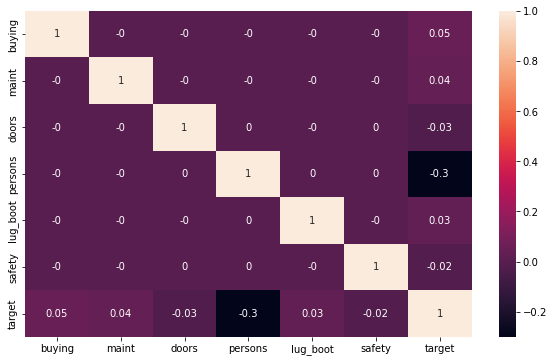

In [24]:
plt.figure(figsize=(10,6))

sns.heatmap(corr_matrix,annot=True)
plt.title('')

## 5. Modelling

### Normal ways 

In [25]:
df

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [26]:
#split X and y 

X = df.drop('target',axis=1)
y = df['target']

In [27]:
#Split train and test 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.2)

#### Feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

models = {
    'RandomForest Classifier':RandomForestClassifier(),
    'ExtraTreesClassifier':  ExtraTreesClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
    
}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    for name,model in models.items():
        
        model.fit(X_train,y_train)
        
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [30]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)

model_scores

{'RandomForest Classifier': 0.9276934201012292,
 'ExtraTreesClassifier': 0.900939985538684,
 'AdaBoostClassifier': 0.8062183658712943,
 'KNN': 0.8177874186550976,
 'SVM': 0.8271872740419378}

In [31]:
#plotting the score 

data = pd.DataFrame(model_scores,index=['Accuracy Score'])
data

,RandomForest Classifier,ExtraTreesClassifier,AdaBoostClassifier,KNN,SVM
Accuracy Score,0.927693,0.90094,0.806218,0.817787,0.827187


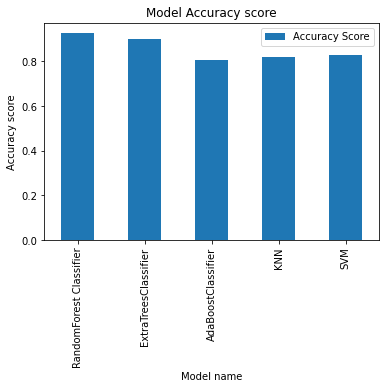

In [32]:
data.T.plot(kind='bar')
plt.title('Model Accuracy score')
plt.xlabel('Model name')
plt.ylabel('Accuracy score');

#### Hyperparameter tuning is done towards the best accuracy score which is RandomForestClassifier 

In [33]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
# Let's tune using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],  
    'min_samples_split': [2, 5, 10],  
    'criterion': ['gini', 'entropy']  
}

gs_rf = GridSearchCV(estimator=model,
            param_grid=param_grid,
            cv=5,
            verbose=3)
gs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.928 total time=   0

[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.899 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.942 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=

[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.768 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.812 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.855 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.899 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.841 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.812 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=None, max_features

[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.826 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.826 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.928 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.855 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.826 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.841 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samp

[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.913 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.797 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.841 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.913 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.870 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_sam

[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.826 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.855 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.899 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.913 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.826 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.797 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_sam

[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.870 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.870 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.826 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=200;, score=0.812 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.841 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.913 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=20, max_features=auto, min_sam

[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.841 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=200;, score=0.826 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.870 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.913 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.899 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.812 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=20, max_features=sqrt, min_sam

[CV 5/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=2, n_estimators=200;, score=0.783 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.841 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.870 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.797 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=2, n_estimators=300;, score=0.826 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=50;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=20, max_features=log2, min_samp

[CV 2/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.899 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.899 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.855 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=2, n_estimators=300;, score=0.812 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=50;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=50;, score=0.870 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=50;, score=0.826 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=30, max_features=auto, min_sample

[CV 4/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.812 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=300;, score=0.797 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.870 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.855 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.768 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_

[CV 4/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=50;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=50;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.855 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.797 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=30, max_features=log2, min_sampl

[CV 2/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.942 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.855 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.855 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 4/5] END criterion=entropy, ma

[CV 2/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.942 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.870 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.928 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 4/5] END criterion=entropy, ma

[CV 2/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.899 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.870 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.870 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=100;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.928 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=None, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.899 total time=   0.1s
[CV 4/5] END criterion=entropy, ma

[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.928 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.899 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.928 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.870 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, ma

[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.826 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=0.768 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.899 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.855 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.812 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, ma

[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.870 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.928 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.899 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.841 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.812 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.899 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=10, ma

[CV 2/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.928 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.899 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.826 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.812 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.899 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=20, ma

[CV 3/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.812 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=200;, score=0.797 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.942 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.841 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=20, ma

[CV 4/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.826 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=200;, score=0.797 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.841 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.899 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.841 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.812 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.797 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=20, ma

[CV 5/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=200;, score=0.797 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.942 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.826 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=0.797 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=10, n_estimators=50;, score=0.855 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, ma

[CV 1/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.928 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.841 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=0.797 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=50;, score=0.797 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=30, ma

[CV 2/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.899 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.870 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.812 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=300;, score=0.783 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=10, n_estimators=50;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=30, ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=3)

In [35]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 50}

In [36]:
gs_rf.score(X_test,y_test)

0.911062906724512

## ANN

Epoch 1/100
11/11 [==============================] - 1s 25ms/step - loss: 1.3780 - accuracy: 0.3449 - val_loss: 1.1488 - val_accuracy: 0.7108
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 1.0611 - accuracy: 0.6580 - val_loss: 0.9000 - val_accuracy: 0.7108
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.8881 - accuracy: 0.6580 - val_loss: 0.7717 - val_accuracy: 0.7108
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 0.7897 - accuracy: 0.6638 - val_loss: 0.7161 - val_accuracy: 0.7115
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.7294 - accuracy: 0.6928 - val_loss: 0.6833 - val_accuracy: 0.7166
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 0.6954 - accuracy: 0.6986 - val_loss: 0.6636 - val_accuracy: 0.7195
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 0.6665 - accuracy: 0.7101 - val_loss: 0.6474 - val_accuracy: 0.7216
Epoch 8/100


11/11 [==============================] - 0s 8ms/step - loss: 0.0809 - accuracy: 0.9971 - val_loss: 0.2257 - val_accuracy: 0.8995
Epoch 59/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0811 - accuracy: 0.9942 - val_loss: 0.2241 - val_accuracy: 0.9002
Epoch 60/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0749 - accuracy: 0.9942 - val_loss: 0.2259 - val_accuracy: 0.9024
Epoch 61/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0712 - accuracy: 1.0000 - val_loss: 0.2214 - val_accuracy: 0.9060
Epoch 62/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0701 - accuracy: 1.0000 - val_loss: 0.2234 - val_accuracy: 0.9060
Epoch 63/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0669 - accuracy: 1.0000 - val_loss: 0.2208 - val_accuracy: 0.9017
Epoch 64/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0649 - accuracy: 1.0000 - val_loss: 0.2165 - val_accuracy: 0.9074
Epoch 65/100
11/11 

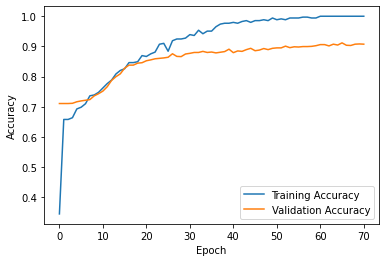

In [37]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)
# Define your ANN model as you did previously
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=5,          # Number of epochs with no improvement before stopping
                               restore_best_weights=True)  # Restore the best weights when stopping

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

44/44 [==============================] - 0s 997us/step


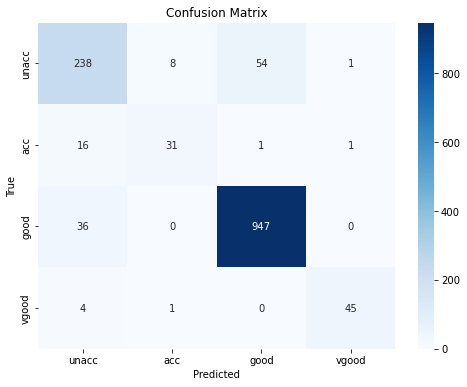

In [38]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions using the trained ANN model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions to class labels

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Create a function to plot the confusion matrix
def plot_confusion_matrix(confusion_mtx, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Define the class labels (unacc, acc, good, vgood) based on your dataset
class_labels = ['unacc', 'acc', 'good', 'vgood']

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, class_labels)
